# Procedure

Goal: Evaluate the effect of synthetic data for downstream task (fraud detection). 

## **Input Data**: Raw, SDV, DataSyn

1. Raw data
2. SDV synthetic data
3. DataSynthesizer synthetic data

## **Fraud detection models**: 

1. Na ̈ıve Bayes (NB)
2. Support Vector Machine (SVM)
3. K-nearest neighbour (KNN)
4. Random Forest (RF)
5. Logistic Regression (LR)
6. Majority Voting

## **Performance Metrics**:

1. Accuracy
2. Actuality Fraud catcched
3. False Positive Rate
4. False Negative Rate
5. Precision-Recall curve
6. ROC curve
7. Confusion matrix.



# Step 0 Load data

## Size of credit card fraud data
- Total: 7300 (29 covariates, 1 outcome)
- No fraud: 7000
- Fraud: 300 

## Fraud rate
- fraud rate : 300/7000 = 0.041 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np
import matplotlib.pyplot as plt
# Import pandas and read csv
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/creditcard_sampledata_2.csv")

# Explore the features available in the dataframe
## print(df.info())

# Count the occurrences of fraud and no fraud and print them
occ = df['Class'].value_counts()
print(occ)

# Print the ratio of fraud cases
print(occ / len(df.index)) 

0    7000
1     300
Name: Class, dtype: int64
0    0.958904
1    0.041096
Name: Class, dtype: float64


# Step 1 Generate data

- Visualize no fraud (class 0) and fraud (class 1) at certain covariate direction. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


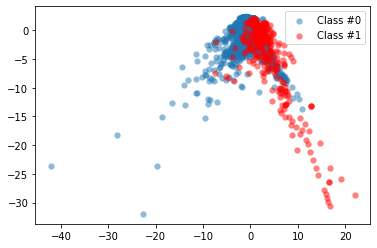

In [6]:
# Define a function to turn dataframe to feature and response

def prep_data(df):
    X = df.iloc[:, 1:29]
    X = np.array(X).astype(np.float)
    y = df.iloc[:, 30]
    y=np.array(y).astype(np.float)
    return X,y

# Define a function to create a scatter plot of our data and labels
def plot_data(X, y):
    plt.scatter(X[y == 0, 1], X[y == 0, 0], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 1], X[y == 1, 0], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

# Create X and y from our above defined function
X, y = prep_data(df)

# Plot our data by running our plot data function on X and y
plot_data(X, y)

**Task 1**: 
- Visualize no fraud (class 0) and fraud (class 1) distributions of raw, SDV, DS data.
- Do the synthetic data preserve certain relative characteristic between no fraud class and fraud class? 

# Step 2 Model

- Below I provide random forest models

In [7]:
# Split your data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Import the random forest model from sklearn
# Define the model as the random forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=5)

# Fit the model to our training set
model.fit(X_train, y_train)




0.9917808219178083


# Step 3 Evaluation 

- Metric 1: Accuracy
- Metric 2: ROC_AUC score
- Metric 3: Classification report 
- Metric 4: Confusion matrix 

## Print 4 Metrics



In [10]:
# Print the accuracy performance metric
from sklearn.metrics import accuracy_score
# Import the packages to get the different performance metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Obtain the predictions from our random forest model 
predicted = model.predict(X_test)
# Predict probabilities
probs = model.predict_proba(X_test)

# Print Matric 1: accuracy
print(accuracy_score(y_test, predicted))
# Print Matric 2: the ROC curve
print(roc_auc_score(y_test, probs[:,1]))
# Print Matric 3: classification report 
print(classification_report(y_test, predicted))
# Print Matric 4: confusion matrix
print(confusion_matrix(y_test, predicted))


0.9917808219178083
0.961093456329283
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2099
         1.0       0.99      0.81      0.89        91

    accuracy                           0.99      2190
   macro avg       0.99      0.91      0.94      2190
weighted avg       0.99      0.99      0.99      2190

[[2098    1]
 [  17   74]]


## Plot Precision Recall Curve


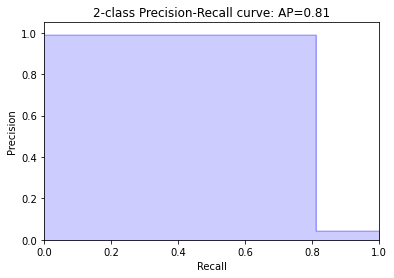

In [11]:
from sklearn.metrics import average_precision_score, precision_recall_curve
# Calculate average precision and the PR curve
average_precision = average_precision_score(y_test, predicted)

# Obtain precision and recall
precision, recall, _ = precision_recall_curve(y_test, predicted)

# Plot the recall precision tradeoff
def plot_pr_curve(recall, precision, average_precision):
  plt.step(recall, precision, color='b', alpha=0.2, where='post')
  plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.ylim([0.0, 1.05])
  plt.xlim([0.0, 1.0])
  plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
  plt.show()

plot_pr_curve(recall, precision, average_precision)

# Instructions

## Data Source (3 ways): 
- raw (no synthetic)
- SDV
- DS

## Performance metric source (4 ways): 
- Metric 1: Accuracy
- Metric 2: ROC_AUC score
- Metric 3: Classification report
- Metric 4: Confusion matrix

## Models source (Many ways):

- Models: try many models and see their performance change on different data source

## Source of classification models

- All classification models you tried before. 
- [`sklearn.linear_model`](https://scikit-learn.org/stable/modules/linear_model.html#): Logistic regression, and other models if you have time to try.
- [`sklearn.ensemble`](https://scikit-learn.org/stable/modules/ensemble.html): Voting Classifier, and other models if you have time to try.
- [`sklearn.tree`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html): DecisionTreeClassifier. 